In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import joblib

In [3]:
df = pd.read_csv("estudiantes_limpio.csv")

In [4]:
df.head(10)

,genero,edad,presionAcademica,satisfaccionEstudios,sueno,alimentacion,suicidio,horasEstudio,estresFinanciero,antecedentes,depresion
0,Masculino,28,2,4,7-8 horas,Moderados,Yes,9,2,Yes,No
1,Masculino,28,4,5,5-6 horas,Saludables,Yes,7,1,Yes,No
2,Masculino,25,1,3,5-6 horas,No saludables,Yes,10,4,No,Yes
3,Masculino,23,1,4,Más de 8 horas,No saludables,Yes,7,2,Yes,No
4,Femenino,31,1,5,Más de 8 horas,Saludables,Yes,4,2,Yes,No
5,Masculino,19,4,4,5-6 horas,No saludables,Yes,1,4,Yes,Yes
6,Femenino,34,4,2,Más de 8 horas,Moderados,Yes,6,2,No,Yes
7,Femenino,20,4,1,Más de 8 horas,Saludables,Yes,3,4,Yes,Yes
8,Femenino,33,1,4,Más de 8 horas,Moderados,No,10,3,No,No
9,Masculino,33,4,3,Menos de 5 horas,No saludables,Yes,10,1,No,Yes


In [5]:
df["suicidio"] = df["suicidio"].replace({"Yes": 1,"No": 0})

df["antecedentes"] = df["antecedentes"].replace({"Yes": 1,"No": 0})

df["depresion"] = df["depresion"].replace({"Yes": 1,"No": 0})

map_sueno = {
    "7-8 horas": 1,
    "5-6 horas": 2,
    "Más de 8 horas": 3,
    "Menos de 5 horas": 4
}

if "sueno" in df.columns and df["sueno"].dtype == "object":
    df["sueno"] = df["sueno"].map(map_sueno)

map_alimentacion = {
    "Moderados": 1,
    "Saludables": 2,
    "No saludables": 3
}

if "alimentacion" in df.columns and df["alimentacion"].dtype == "object":
    df["alimentacion"] = df["alimentacion"].map(map_alimentacion)

map_genero = {
    "Masculino": 1,
    "Femenino": 2
}

if "genero" in df.columns and df["genero"].dtype == "object":
    df["genero"] = df["genero"].map(map_genero)

X = df.drop(columns=["depresion"])
y = df["depresion"]

print(df.isnull().sum())


genero                  0
edad                    0
presionAcademica        0
satisfaccionEstudios    0
sueno                   0
alimentacion            0
suicidio                0
horasEstudio            0
estresFinanciero        0
antecedentes            0
depresion               0
dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_4268\2609503049.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["suicidio"] = df["suicidio"].replace({"Yes": 1,"No": 0})
C:\Users\Usuario\AppData\Local\Temp\ipykernel_4268\2609503049.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["antecedentes"] = df["antecedentes"].replace({"Yes": 1,"No": 0})
C:\Users\Usuario\AppData\Local\Temp\ipykernel_4268\2609503049.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retai

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [7]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

joblib.dump(model, "modelo_logistico.pkl")

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        50
           1       0.93      0.98      0.95        51

    accuracy                           0.95       101
   macro avg       0.95      0.95      0.95       101
weighted avg       0.95      0.95      0.95       101



['modelo_logistico.pkl']

               Variable  Coeficiente
6              suicidio     5.042570
2      presionAcademica     1.874364
8      estresFinanciero     1.188933
9          antecedentes     0.857228
5          alimentacion     0.505400
7          horasEstudio     0.363111
4                 sueno     0.227500
0                genero    -0.237669
1                  edad    -0.332529
3  satisfaccionEstudios    -1.146000
Intercepto (bias): -3.4362106467911353


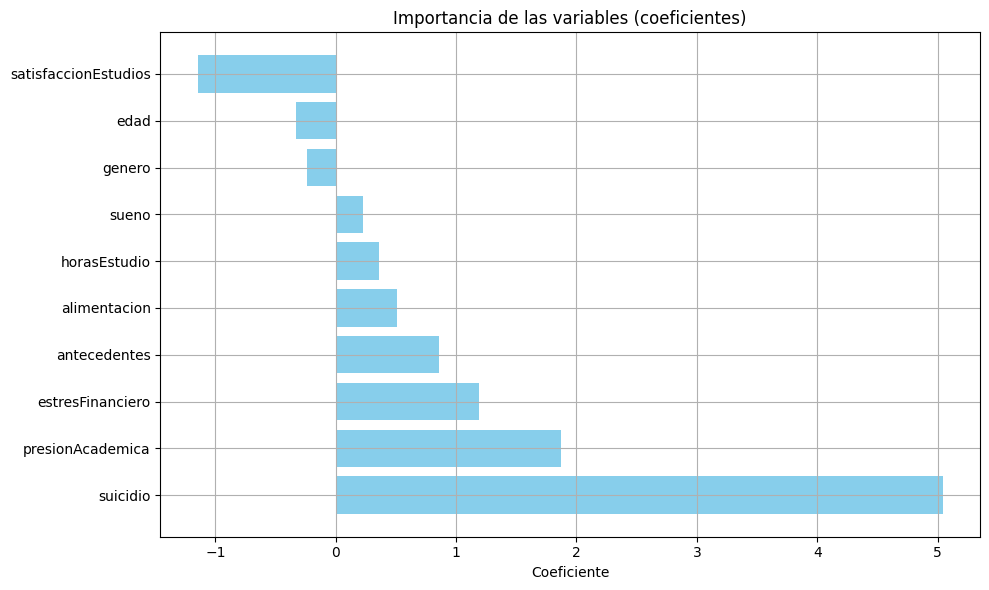

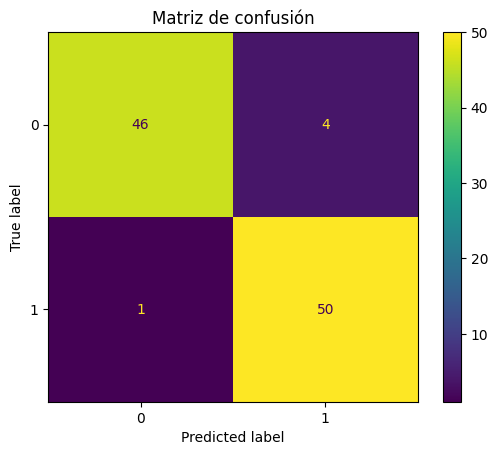

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        50
           1       0.93      0.98      0.95        51

    accuracy                           0.95       101
   macro avg       0.95      0.95      0.95       101
weighted avg       0.95      0.95      0.95       101

Probabilidades de depresión (primeros 10):
[1.62084729e-06 6.93352728e-01 8.93607697e-01 7.79433358e-01
 7.72332504e-01 1.81152442e-03 1.87903219e-01 9.91856382e-01
 5.15896410e-05 9.88031760e-01]


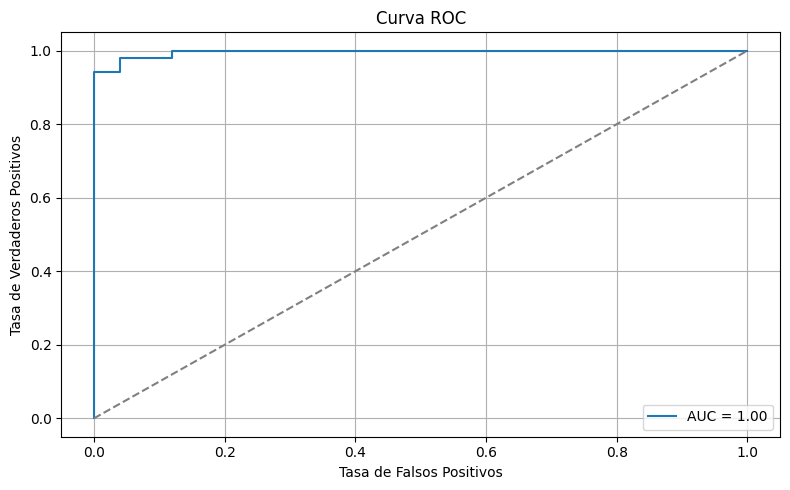

In [8]:
import pandas as pd

coeficientes = model.coef_[0]
caracteristicas = X_train.columns

df_coef = pd.DataFrame({
    "Variable": caracteristicas,
    "Coeficiente": coeficientes
}).sort_values(by="Coeficiente", ascending=False)

print(df_coef)

print("Intercepto (bias):", model.intercept_[0])

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(df_coef["Variable"], df_coef["Coeficiente"], color="skyblue")
plt.title("Importancia de las variables (coeficientes)")
plt.xlabel("Coeficiente")
plt.grid(True)
plt.tight_layout()
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matriz de confusión")
plt.show()

from sklearn.metrics import classification_report

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva
print("Probabilidades de depresión (primeros 10):")
print(y_prob[:10])



from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
